In [1]:
import spacy
nlp = spacy.load('en_core_web_sm')
import pandas as pd
import numpy as np

 ** Classification model football / boxing categories**

In [2]:
import io
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import files
uploaded = files.upload()

Saving football_nlp.csv to football_nlp.csv


In [3]:
df_foot = pd.read_csv(io.BytesIO(uploaded['football_nlp.csv']))
df_foot = df_foot.set_index('Unnamed: 0')
df_foot.index.names = ['index']
df_foot.head(3)

,Text
index,
0,WSL: Dominant City lead in Manchester derby - ...
1,"Man Utd rumours have not affected form, says S..."
2,Man Utd doing things right way over women's te...


In [4]:
uploaded2 = files.upload()


Saving boxing_nlp.csv to boxing_nlp.csv


In [5]:
df_box = pd.read_csv(io.BytesIO(uploaded2['boxing_nlp.csv']))
df_box = df_box.set_index('Unnamed: 0')
df_box.index.names = ['index']
df_box.head(3)

,Text
index,
0,Katie Taylor's undisputed lightweight world ti...
1,"Tom Little wonders if Alen Babic can ""be hit b..."
2,Eddie Hearn says he 'can't believe the improve...


In [6]:
len(df_box)

305

In [7]:
foot_label = pd.Series(np.ones(len(df_foot), int))
box_label = pd.Series(np.zeros(len(df_box), int))
box_label

0      0
1      0
2      0
3      0
4      0
      ..
300    0
301    0
302    0
303    0
304    0
Length: 305, dtype: int64

In [8]:
df_box['Label'] = box_label
df_box.head()

,Text,Label
index,,
0,Katie Taylor's undisputed lightweight world ti...,0
1,"Tom Little wonders if Alen Babic can ""be hit b...",0
2,Eddie Hearn says he 'can't believe the improve...,0
3,"Anthony Joshua's world title fight has ""extra ...",0
4,Fabio Wardley believes he is too fresh and has...,0


In [9]:
df_foot['Label'] = foot_label
df_foot.head()

,Text,Label
index,,
0,WSL: Dominant City lead in Manchester derby - ...,1
1,"Man Utd rumours have not affected form, says S...",1
2,Man Utd doing things right way over women's te...,1
3,Man Utd have no plans to re-sign Ronaldo - Sat...,1
4,Nigeria shocked as Sierra Leone fight back fro...,1


In [10]:
data = df_foot.append(df_box, ignore_index = True)
data.head(10)

,Text,Label
0,WSL: Dominant City lead in Manchester derby - ...,1
1,"Man Utd rumours have not affected form, says S...",1
2,Man Utd doing things right way over women's te...,1
3,Man Utd have no plans to re-sign Ronaldo - Sat...,1
4,Nigeria shocked as Sierra Leone fight back fro...,1
5,"Who plays who, where and when? Everything you ...",1
6,Puskas award contender? Defender scores acroba...,1
7,Liverpool's Jones and Chelsea's Hudson-Odoi sc...,1
8,"'Good riddance to false dawns, hello bright ne...",1
9,Can you name Belgians with most Premier League...,1


In [11]:
pd.set_option('max_colwidth', 1000)


In [12]:
def preprocess(messg):
  messg = messg.lower()
  messg = nlp(messg)
  doc = " ".join(char.lemma_ for char in messg if (not char.is_stop and not char.is_punct and not char.like_num))
  return doc

In [13]:
df_all = data.copy()
df_all.tail()

,Text,Label
604,The heavyweight legend’s story is only partially told with his brother looking to correct some wrongs and divulge never-before-heard stories,0
605,"It lasted just 50 seconds, a short cameo and the latest fight in his strange career.",0
606,"They go to prison for rape, for assaulting their partners, for avoiding tax, they shoot people in cold blood, they support harsh regimes, they fail drug tests, they believe in religious extremes and still we find a way to forgive our boxing idols.",0
607,"The brilliant, tragic tale of Battling Siki: boxing’s first African world champion we can ill afford to forget",0
608,The heavyweight miracle that still sends Hasim Rahman into starry-eyed wonder.,0


In [14]:
df_all["Text"] = df_all["Text"].apply(preprocess)
df_all.tail()

,Text,Label
604,heavyweight legend story partially tell brother look correct wrong divulge hear story,0
605,last second short cameo late fight strange career,0
606,prison rape assault partner avoid tax shoot people cold blood support harsh regime fail drug test believe religious extreme find way forgive box idol,0
607,brilliant tragic tale battle siki box african world champion ill afford forget,0
608,heavyweight miracle send hasim rahman starry eyed wonder,0


In [15]:
X = df_all["Text"]
y = df_all["Label"]

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)


In [17]:
from sklearn.naive_bayes import MultinomialNB

naive_model = MultinomialNB()

## **Tf-Idf + Multinomial Naive Bayes**

In [18]:
from sklearn.pipeline import Pipeline

model_naive1 = Pipeline([('tfidf', TfidfVectorizer()), ('naive_model', MultinomialNB())])

In [19]:
model_naive1.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('naive_model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [20]:
X_train.shape

(487,)

In [21]:
y_test.shape

(122,)

In [22]:
predictions1 = model_naive1.predict(X_test)

In [23]:
from sklearn import  metrics
metrics.confusion_matrix(y_test, predictions1)

array([[65,  1],
       [ 1, 55]])

In [24]:
predictions1

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0])

In [25]:
predictions1.sum()

56

In [26]:
from sklearn import  metrics
df_conf = pd.DataFrame(metrics.confusion_matrix(y_test, predictions1), index=['true_box', 'true_football'], columns=['predicted_box', 'predicted_football'])
df_conf

,predicted_box,predicted_football
true_box,65,1
true_football,1,55


In [27]:
print(metrics.classification_report(y_test, predictions1))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        66
           1       0.98      0.98      0.98        56

    accuracy                           0.98       122
   macro avg       0.98      0.98      0.98       122
weighted avg       0.98      0.98      0.98       122



In [28]:
acc_naive1 = metrics.accuracy_score(y_test, predictions1, normalize=True)
print(f'Model accuracy is {round(acc_naive1, 3)}')

Model accuracy is 0.984


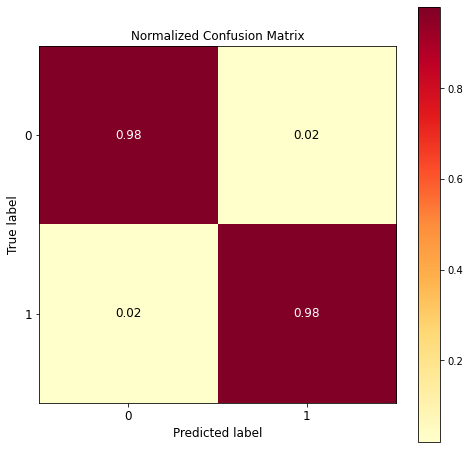

In [29]:
! pip install -q scikit-plot

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, predictions1, cmap = 'YlOrRd', normalize=True, text_fontsize='large', figsize=(8,8))
plt.show()

In [30]:
from wordcloud import  WordCloud
football_word_set = df_all["Text"][:304]
football_word_set = " ".join(text for text in football_word_set)

boxing_word_set = df_all["Text"][304:]
boxing_word_set = " ".join(text for text in boxing_word_set)

In [31]:
len(football_word_set)

46669

In [32]:
len(boxing_word_set)

46240

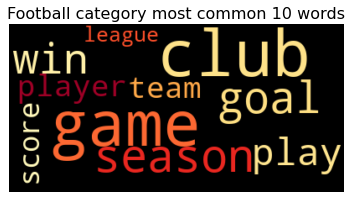

In [84]:
wordcloud_foot = WordCloud(max_words=10, colormap='YlOrRd').generate(football_word_set)
plt.imshow(wordcloud_foot, interpolation='bilinear')
plt.title('Football category most common 10 words', fontsize=16)
plt.axis("off")
plt.show()

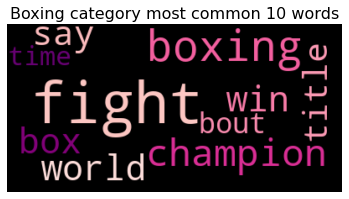

In [85]:
wordcloud_box = WordCloud(max_words=10, colormap='RdPu').generate(boxing_word_set)
plt.imshow(wordcloud_box, interpolation='bilinear')
plt.title('Boxing category most common 10 words', fontsize=16)
plt.axis("off")
plt.show()

In [86]:
from google.colab import files
import pickle

pkl_filename = "pickle_model_tfnb.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model_naive1, file)


In [87]:
files.download('pickle_model_tfnb.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Counter Vector + Multinomial Naive Bayes**

In [37]:
X = df_all["Text"]
y = df_all["Label"]

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

model_naive2 = Pipeline([('count_vector', CountVectorizer()), ('naive_model', MultinomialNB())])

In [39]:
model_naive2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('count_vector',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('naive_model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [40]:
X_train.shape

(487,)

In [41]:
y_test.shape

(122,)

In [42]:
predictions2 = model_naive2.predict(X_test)
predictions2

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [43]:
predictions2.sum()

55

In [44]:
from sklearn import  metrics
df_conf = pd.DataFrame(metrics.confusion_matrix(y_test, predictions2), index=['true_box', 'true_football'], columns=['predicted_box', 'predicted_football'])
df_conf

,predicted_box,predicted_football
true_box,66,0
true_football,1,55


In [45]:
print(metrics.classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        66
           1       1.00      0.98      0.99        56

    accuracy                           0.99       122
   macro avg       0.99      0.99      0.99       122
weighted avg       0.99      0.99      0.99       122



In [46]:
acc_naive2 = metrics.accuracy_score(y_test, predictions2, normalize=True)
print(f'Model accuracy is {round(acc_naive2, 3)}')

Model accuracy is 0.992


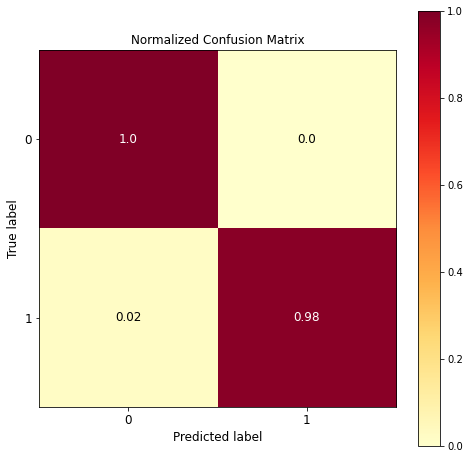

In [47]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, predictions2, cmap = 'YlOrRd', normalize=True, text_fontsize='large', figsize=(8,8))
plt.show()

In [60]:
wordcloud_foot.to_file("top_football.png")
wordcloud_box.to_file("top_boxing.png")
files.download('top_football.png') 
files.download('top_boxing.png') 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [88]:

pkl_filename2 = "pickle_model_countvec.pkl"
with open(pkl_filename2, 'wb') as file:
    pickle.dump(model_naive2, file)
files.download("pickle_model_countvec.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>